# Applied Machine Learning: Module 2 (Supervised Learning, Part I)

## Review

In [5]:
%matplotlib notebook

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

fruits = pd.read_table('/Users/riro/Documents/GitHub/umich_ds/ml/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.7]]
example_fruit_scaled = scaler.transform(example_fruit)
print(f'Predicted fruit type for {example_fruit} is {target_names_fruits[knn.predict(example_fruit_scaled)[0]-1]}')


Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for [[5.5, 2.2, 10, 0.7]] is mandarin


## Datasets

In [6]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF', '#000000'])

Synthetic dataset for simple regresion

<IPython.core.display.Javascript object>


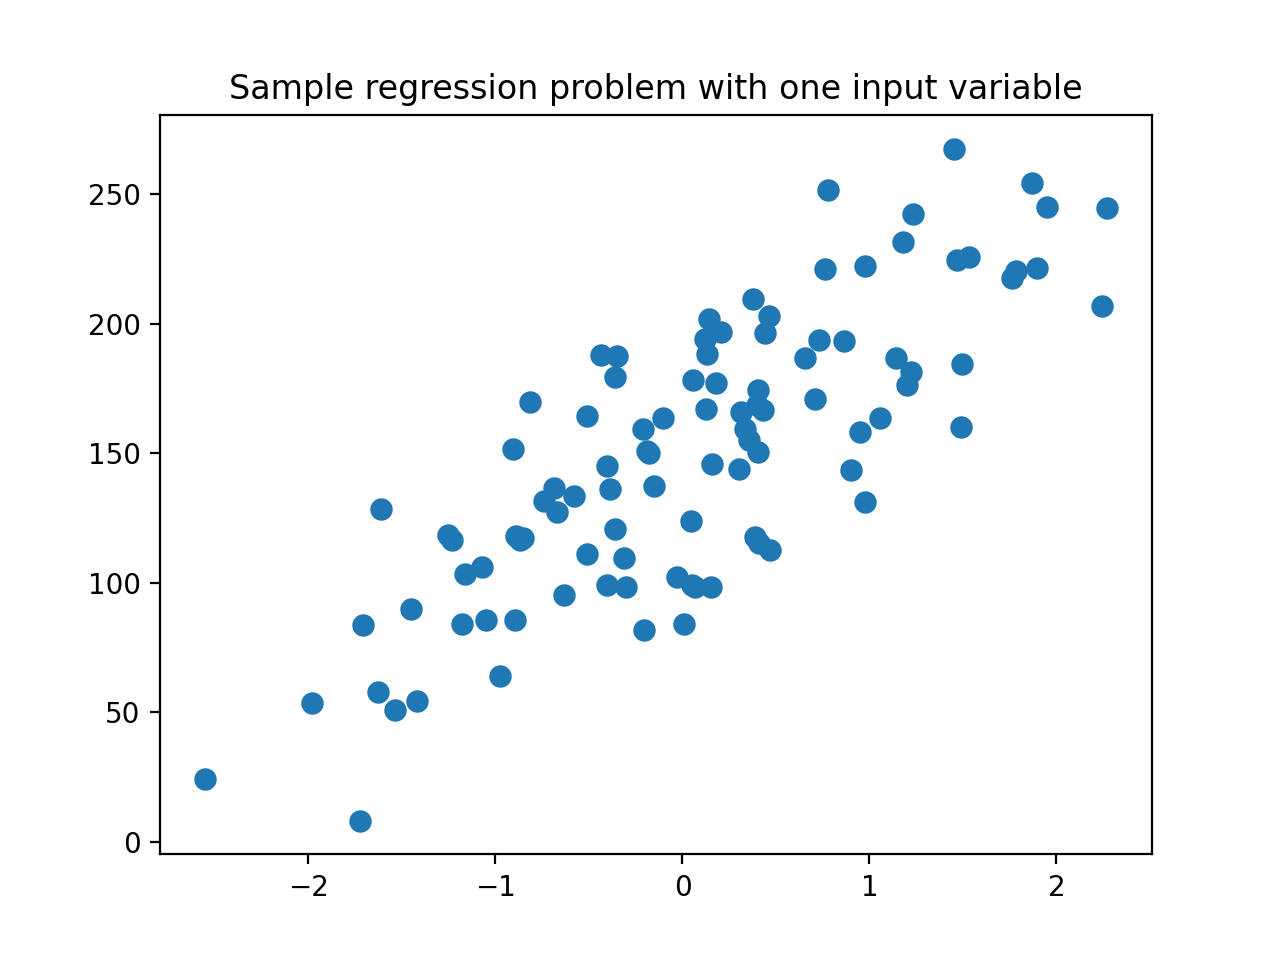

In [8]:
from sklearn.datasets import make_regression

plt.figure()
plt.title('Sample regression problem with one input variable')

X_R1, y_R1 = make_regression(n_samples=100, n_features=1, n_informative=1, bias=150,
                             noise=30, random_state=0)

plt.scatter(X_R1, y_R1, marker='o', s=50)
plt.show()

Synthetic dataset for more complex regression

<IPython.core.display.Javascript object>


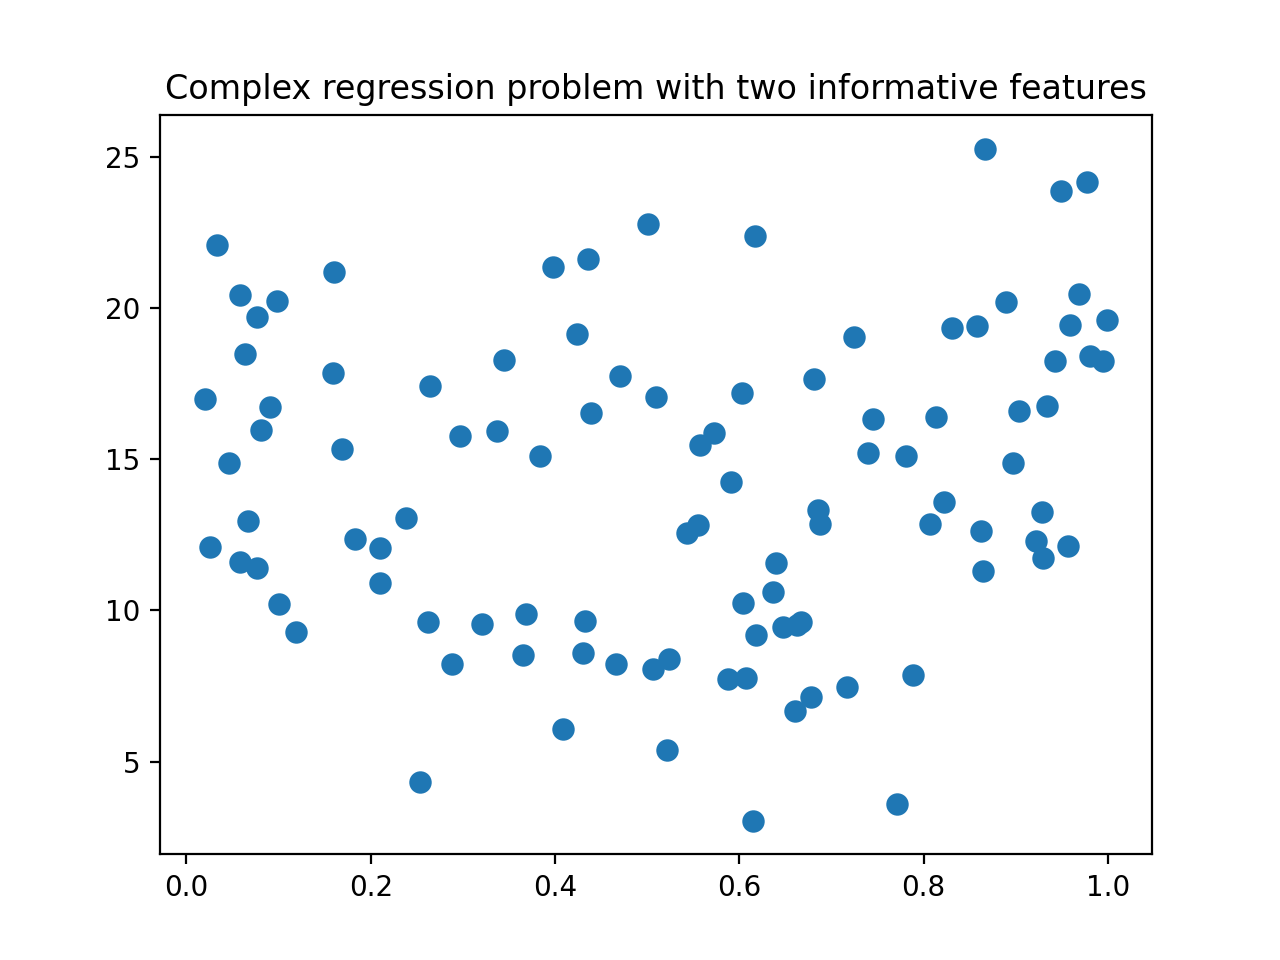

In [10]:
from sklearn.datasets import make_friedman1

plt.figure()
plt.title('Complex regression problem with two informative features')

X_F1, y_F1 = make_friedman1(n_samples=100, n_features=7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker='o', s=50)
plt.show()

Synthetic dataset for binary classification

<IPython.core.display.Javascript object>


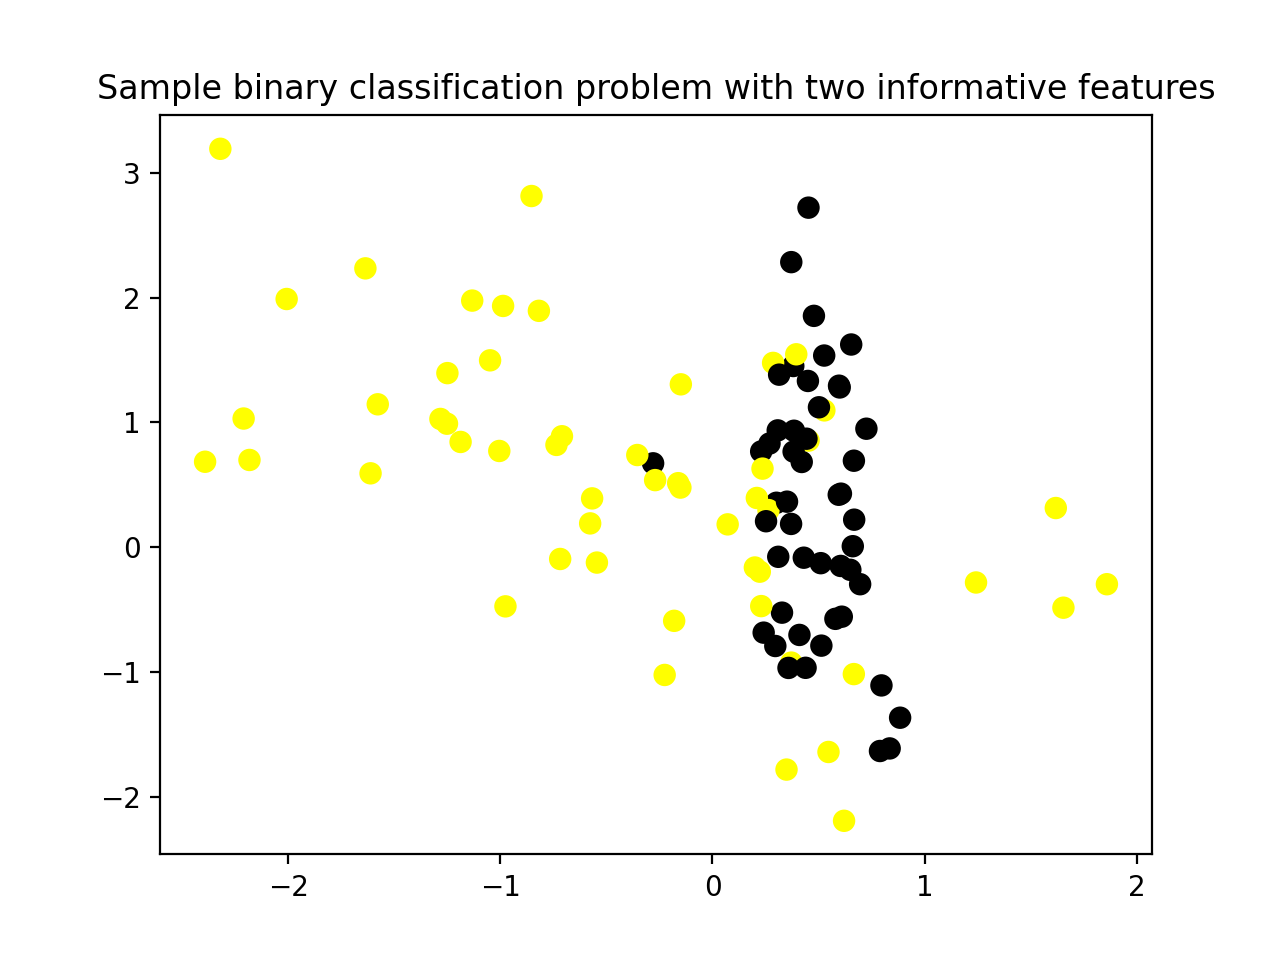

In [12]:
plt.figure()
plt.title('Sample binary classification problem with two informative features')

X_C2, y_C2 = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                 n_informative=2, n_clusters_per_class=1, flip_y=0.1,
                                 class_sep=0.5, random_state=0)

plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2, marker='o', s=50, cmap=cmap_bold)
plt.show()

More difficult synthetic dataset for binary classification with classes that are not linearly separable

<IPython.core.display.Javascript object>


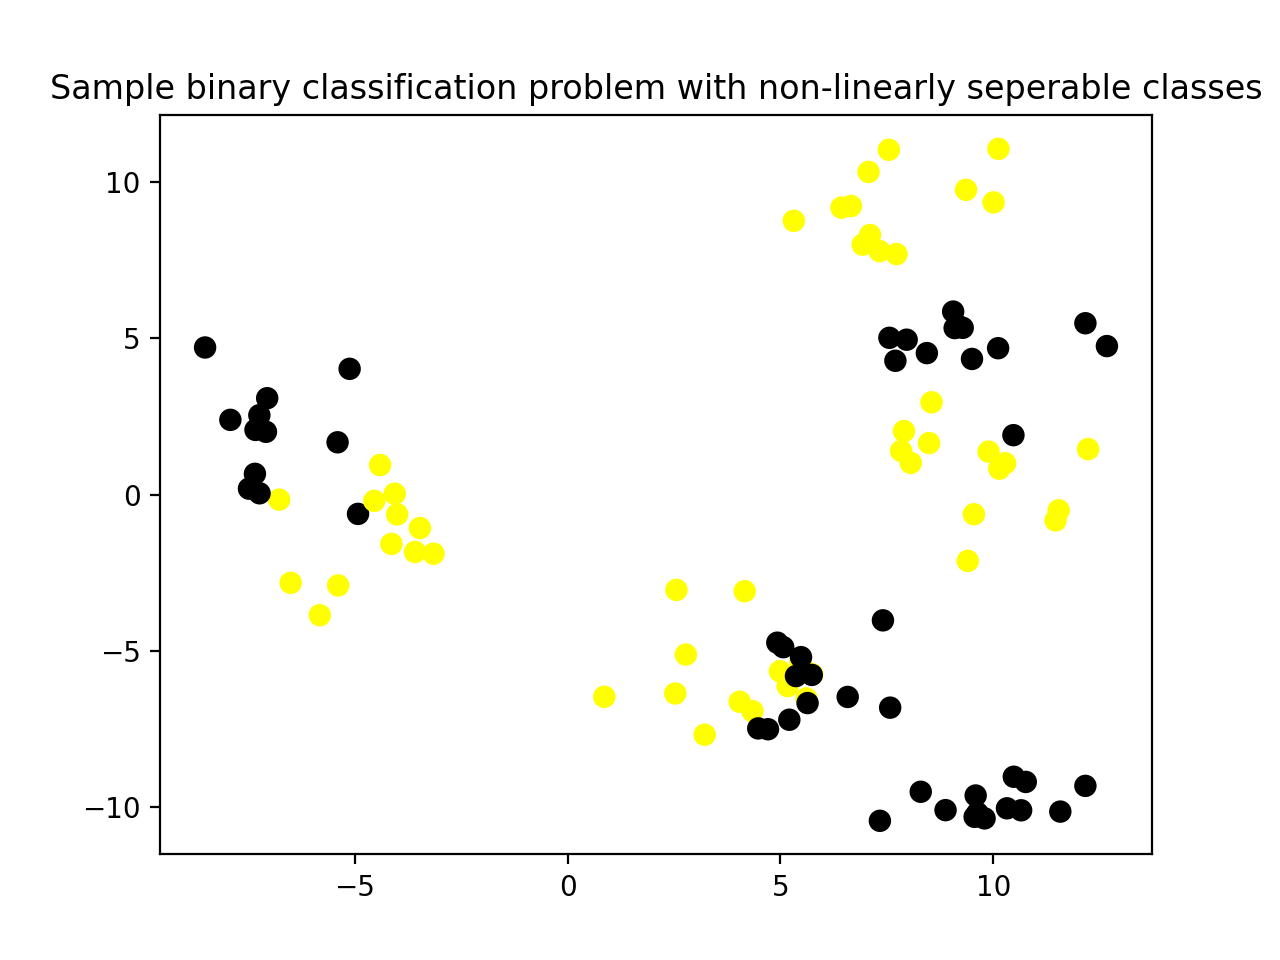

In [13]:
X_D2, y_D2 = make_blobs(n_samples=100, n_features=2, centers=8, cluster_std=1.3, random_state=4)
y_D2 = y_D2 % 2

plt.figure()
plt.title('Sample binary classification problem with non-linearly seperable classes')

plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, marker='o', s=50, cmap=cmap_bold)
plt.show()

Breast cancer dataset for classification

In [14]:
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

Communities and crime dataset

In [18]:
(X_crime, y_crime) = load_crime_dataset()

AttributeError: 'DataFrame' object has no attribute 'ix'